# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect("superhero_db.sqlite")
cursor = connection.cursor()


df_battles = pd.read_csv('battles.csv')
df_heroes = pd.read_csv('heroes.csv')
df_villains = pd.read_csv('villains.csv')

# Display the first few rows of the DataFrame
print(df_battles.head())
print(df_heroes.head())
print(df_villains.head())

# Insert data from the DataFrame into the sales table
df_battles.to_sql('battles', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the battles table.")

df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the heroes table.")

df_villains.to_sql('villains', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the villians table.")

# Fetch all data from the sales table
cursor.execute("SELECT * FROM battles")
battles_data = cursor.fetchall()

cursor.execute("SELECT * FROM heroes")
heroes_data = cursor.fetchall()

cursor.execute("SELECT * FROM villains")
villians_data = cursor.fetchall()

# Print the results
print("All battles data:")
for row in battles_data:
    print(row)

print("\nAll heroes data:")
for row in heroes_data:
    print(row)

print("\nAll villains data:")
for row in villians_data:
    print(row)

connection.commit()
connection.close()

   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins
   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
Data from CSV has been inserted into the battles table.
Data from CSV has been inserted into the heroes ta

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
import sqlite3

connection = sqlite3.connect("superhero_db.sqlite")
cursor = connection.cursor()

# Query 1: Retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes")
heroes_powers = cursor.fetchall()
print("All superheroes and their powers:")
for row in heroes_powers:
    print(row)

# Query 2: Find all battles where the hero won
cursor.execute("SELECT * FROM battles WHERE outcome = 'hero_won'")
hero_wins = cursor.fetchall()
print("\nBattles where the hero won:")
for battle in hero_wins:
    print(battle)

# Query 3: List all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains")
villains_plans = cursor.fetchall()
print("\nVillains and their Evil Plans:")
for villain in villains_plans:
    print(villain)

# Query 4: Determine which superhero has fought the most battles
cursor.execute("""
    SELECT hero_id, COUNT(*) AS battle_count
    FROM battles
    GROUP BY hero_id
    ORDER BY battle_count DESC
    LIMIT 1
""")
top_hero = cursor.fetchone()
print("\nSuperhero with the most battles:")
print(top_hero)

connection.close()


All superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')

Battles where the hero won:

Villains and their Evil Plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')

Superhero with the most battles:
(3, 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
connection = sqlite3.connect("superhero_db.sqlite")
cursor = connection.cursor()

# sidekicks table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sidekicks (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_name TEXT,
        sidekick_name TEXT,
        FOREIGN KEY (hero_name) REFERENCES heroes(name)
    )
""")

print("Sidekicks table created successfully.")

connection.commit()
connection.close()


Sidekicks table created successfully.


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

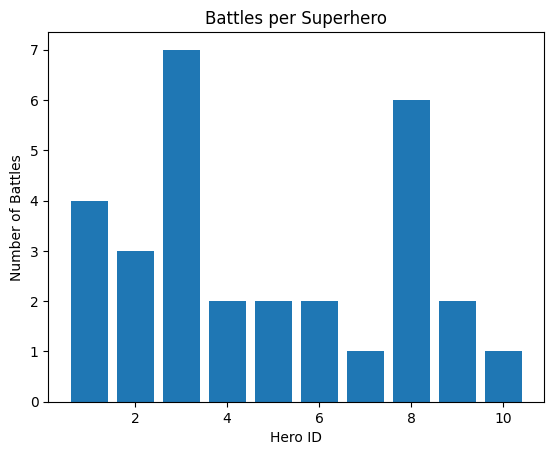

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect("superhero_db.sqlite")
cursor = connection.cursor()

# Query to count battles per superhero
cursor.execute("""
    SELECT hero_id, COUNT(*) AS battle_count
    FROM battles
    GROUP BY hero_id
""")
battle_counts = cursor.fetchall()

connection.close()

# Prepare data for visualization
hero_ids = [row[0] for row in battle_counts]
battle_counts = [row[1] for row in battle_counts]

# Plot the data
plt.bar(hero_ids, battle_counts)
plt.xlabel('Hero ID')
plt.ylabel('Number of Battles')
plt.title('Battles per Superhero')
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!